# Data Sources:

## Population/Contraception Data
 2017-2019 (National Survey of Family Growth)
https://www.cdc.gov/nchs/data/nsfg/2017-2019_NSFG_FemResp_SectionE_Codebook-508.pdf
WebCode has been discontinued as of 2020 :( SO had to go through raw data manually.
Helpful table on contraception
https://www.cdc.gov/nchs/data/databriefs/db388-tables-508.pdf#page=2

## IUD failure rate data
https://www.ohsu.edu/sites/default/files/2020-01/Comparison%20between%20two%2052mg%20levonorgestrel-releasing%20intrauterine%20systems%20Liletta%20and%20Mirena.pdf

https://www.fsrh.org/documents/fsrh-ceu-new-product-review-kyleena-january-2018/

## Abortion Care data Sources
https://www.nytimes.com/interactive/2023/06/22/us/abortion-clinics-dobbs-roe-wade.html
Updated table on pages 20-21 of below pdf using map data from NYT article - found possible undercount of Tennesee abortion closures in NYT article. Used 2019 census figures for 2022 population data (as 2020 Census changed fertile population from 15-49 to 15-44 and 2019 figures were what was previously used in ANSIRH table for 2020 and 2021 years)
https://www.ansirh.org/sites/default/files/2022-06/Trends%20in%20Abortion%20Care%20in%20the%20United%20States%2C%202017-2021.pdf



An unintended pregnancy is one that
occurred when a woman wanted to
become pregnant in the future but
not at the time she became pregnant
(“wanted later”) or one that occurred
when she did not want to become pregnant then or at any time in the future
(“unwanted”). In this fact sheet, births
resulting from unintended pregnancies
are referred to as “unplanned.” - Guttmacher Institute



In [81]:
## Female Respondent File Codebook - made csv of relevant data
##import csv file info

import requests
import pandas as pd

df = pd.read_csv('NSFG.csv')
#made each column easier to code with
df.columns = [c.lower().replace(' ', '_') for c in df.columns]

df.rename(columns = {'birth_control_methods':'method','percent(%)':'percent','across_population_(females_15-49)':"num_in_pop",'estimated_unintended_pregnancies_':'est_unplnd_prg','planned_pregnancies':'plnd_prg'}, inplace=True)
#wanted to make each pregnancy I extrapolated that of a whole person but could intially not do int(x) for the string of 'NaN' 
#learned apply function on StackedOverflow
#Source: https://stackoverflow.com/questions/44061607/pandas-lambda-function-with-nan-support
df['est_unplnd_prg']=df['est_unplnd_prg'].apply(lambda x : int(x) if pd.notna(x) else x)


My analysis here came from extrapolating the contraceptive habits and patterns of the 6,141 women surveyed in the CDC's National Survey of Family Growth multiplied by each method's failure rate across the whole US population of women who could get pregnant (CDC decided this is those between the ages of 15-49 in 2020 it decided it was 15-44 but this is all data that pre-dates that assumption). This cumulatively finds that 5% of the female population between the ages of 15 and 49 years old in 2019 experience an unplanned pregnancy.

0.049639037138927096


<Figure size 640x480 with 0 Axes>

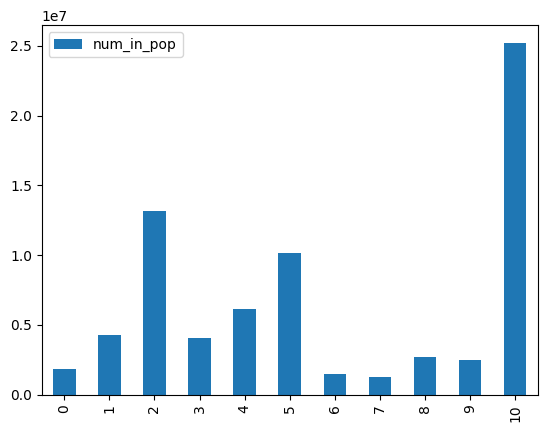

In [97]:
import matplotlib
from matplotlib import pyplot as plt    
import numpy as np

fig1 = plt.figure()
df


#First Map: Bar chart of population on contraception by method - Omit the total population to graph alongside with iloc[:-1]
df[['num_in_pop']].iloc[:-1].plot(kind='bar')
df.describe()

df

#This finds the total estimated number of unplanned pregnancies in the US per year
#NOTE: In the survey, though 35% of respondents reported not being on any form of birth control, only 7.9% of those were having unprotected sex so the 85% instance of pregnancy every year for that method was only applied to 7.9% of the population. 
unplnd_prg_odds = df['est_unplnd_prg'][11]/df['num_in_pop'][11]
print(unplnd_prg_odds)





In [83]:
#Second Graph: Not on contraception - bar graph of population next to stack of unplanned vs planned pregnancies
##dfsum=df

#dfsum.loc[0] += dfsum.loc[1]
#dfsum.set_index('method',inplace=True)
#dfsum.iloc[1]['method'] ='IUD'
#dfsum.drop(1,inplace=True)

#dfsum.set_index('method')[['est_unplnd_prg']].iloc[:1].plot(kind='bar')

#could not get this code to work in the end RIP made a bullet bar graph in DataWrapper using df above



In [84]:
#needed to rename my terrible csv files
df1 = pd.read_csv("IUD_type_per_1000.csv")
df1.rename(columns = {'IUD':'iud_type','Year 1':'1','Year 3 (cumulative)':'3','Year 5 (cumulative)':'5','Year 8 (cumulative)':'8','Year 10 (cumulative':'10'}, inplace=True)
#df1['per 1000 women']= df['y']

df1



,iud_type,1,3,5,8,10
0,Copper,6.0,8.0,14.0,NaN,22.0
1,Mirena,2.0,1.0,7.0,6.8,NaN
2,Skyla,4.0,9.0,NaN,NaN,NaN
3,Liletta,5.0,NaN,10.0,NaN,NaN
4,Kyleena,1.6,NaN,14.0,NaN,NaN


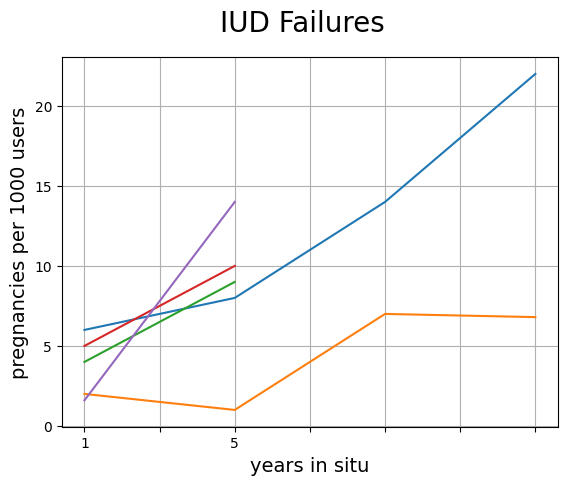

In [85]:
#Fourth Graph: Show amount of IUD failures based of varying efficacy of different brands
#Show that efficacy over longer periods of time decreases

fig = plt.figure()

#I wanted to graph but ran into trouble with 'NaN values so used the dropna() function (googled it because I figured there was opposite to isna) to ignore them and the transpose to do each column as a line instead of each row
for c in df1['iud_type']:
    df1.set_index('iud_type').transpose()[c].dropna().plot()
 

plt.suptitle('IUD Failures', fontsize=20)
plt.xlabel('years in situ', fontsize=14)
plt.ylabel('pregnancies per 1000 users', fontsize=14)

plt.grid()
plt.tick_params()

#To Datawrapper we go




Now to tie this into abortion access - I don't have the geographic data of people in NSFG because it was deemed a privacy concern by the CDC

However can use 2019 Census data (aware out of date but matches my dataset) to find percentage of population of women 15-49 who live in each state and * percent data * then *failure rate * overall census data 2019 and then see what percent of those women will no longer have access to abortion in-state. Can also divide figure by state facility numbers if not 0 to see which would be the most overwhelmed by unplanned pregnancies (estimated to make up 90% of abortions) instead of what the ANSIRH looks at which is total number of women of reproductive age per facility. Should also add in the amount of unplanned pregnancies from no contraception to get a full picture.


In [116]:
#Step One create new data frame of unplanned pregnancies by state
import math
df3 = pd.read_csv("Abortion_care.csv")
#OMG THERE ARE COMMAS GET RID
#Source: https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once

for x in df3.columns:
    if x.startswith('Num-') and x != 'Num-2022':
        df3[x]=df3[x].str.replace(',','')

#make separate df with regions and make this one only states
df3_regions=df3[df3['State'].str.contains("Region")]


df3_states = df3[~df3['State'].str.contains("Region", na=False)]


#Ok now create column of population of each state
df3_states
df3_states['population']=df3_states['Num-2021'].astype(int)*df3_states['F2021']

#ok now estimate how many unplanned pregnancies will happen in each state
df3_states['population']
df3_states['unplanned_estimate']=(df3_states['population']*unplnd_prg_odds).astype(int)
#now estimate how many unplanned pregnancies per clinic
#OH NO BC OF DODD CASE THERE ARE ZERO CLINICS IN MANY MANY STATES (THAT'S INSANE WTF AMERICA?) Do if statement to allow analysis
df3_states['unplanned_prgs_per_clinic']=(df3_states['unplanned_estimate']/df3_states['F2022']).apply(lambda x: int(x) if not math.isinf(x) else x)


df3_states.to_csv(r'/Users/julieiles/Desktop/Lede/GitHub/BC_failure/Abortion_access.csv', index=False)


/var/folders/nj/mp6h919d3tx529bdk0ycnbj80000gn/T/ipykernel_1763/2084085789.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_states['population']=df3_states['Num-2021'].astype(int)*df3_states['F2021']
/var/folders/nj/mp6h919d3tx529bdk0ycnbj80000gn/T/ipykernel_1763/2084085789.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_states['unplanned_estimate']=(df3_states['population']*unplnd_prg_odds).astype(int)
/var/folders/nj/mp6h919d3tx529bdk0ycnbj80000gn/T/ipykernel_1763/2084085789.py:27: Settin

In [ ]:
#When I made my map it was beautiful and I loved it but all states that had 0 abortion clinics were grey and boring and if I want to then shift the estimated unplanned pregnancies towards the nearest state how would I do that....

#idea one NYT how far women have to drive to get an abortion map THEN I found this AMAZING MAP
#https://www.npr.org/sections/health-shots/2023/06/21/1183248911/abortion-access-distance-to-care-travel-miles
